In [2]:
from keras.models import load_model
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

In [3]:
model_hindi = load_model('Hindi_Lenet_Model.h5')
model_guj=load_model('Gujrati_Lenet_Model.h5')
model_eng=load_model('English_Lenet_Model.h5')
model_Language=load_model('Language_Model.h5')


In [4]:
img_folder = r'E:\Sem-6\Digit_Recognition_Project\Combined_30'
data = tf.keras.utils.image_dataset_from_directory(img_folder,image_size=(32, 32), label_mode='categorical')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()



Found 82448 files belonging to 30 classes.


c:\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


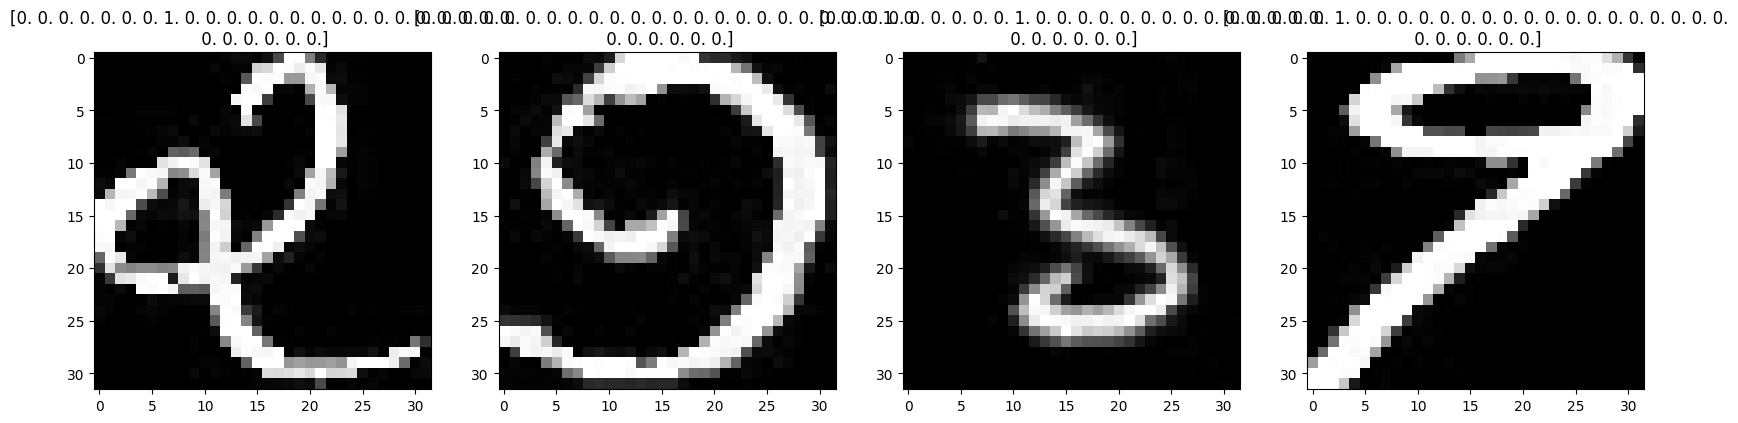

In [4]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
data = data.map(lambda x,y: (x/255, y))
batch = data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [48]:
print(len(val),len(test))

515 257


In [49]:
temp = val.concatenate(test)
print(len(temp))

772


In [36]:
y_true = []
y_pred = []
eng=[]
hin=[]
guj=[]
lan=[]

for X, y in test.as_numpy_iterator():
  y= tf.argmax(y,axis=1)
  y_true.append(y)
  lan.append(tf.argmax(model_Language.predict(X),axis = 1))
  eng.append(tf.argmax(model_hindi.predict(X),axis=1))
  hin.append(tf.argmax(model_hindi.predict(X),axis=1))
  guj.append(tf.argmax(model_guj.predict(X),axis=1))






1/1 [==============================] - 0s 51ms/step


In [37]:
y_true = tf.concat(y_true, axis=0).numpy()
y_true=list(y_true)
lan=tf.concat(lan, axis=0).numpy()
eng=tf.concat(eng, axis=0).numpy()
hin=tf.concat(hin, axis=0).numpy()
guj=tf.concat(guj, axis=0).numpy()

In [38]:
ytrue=[]
for i in y_true:
    if i<3:
        ytrue.append(0)
    elif i<6:
        ytrue.append(1)
    elif i<9:
        ytrue.append(2)
    elif i<12:
        ytrue.append(3)
    elif i<15:
        ytrue.append(4)
    elif i<18:
        ytrue.append(5)
    elif i<21:
        ytrue.append(6)
    elif i<24:
        ytrue.append(7)
    elif i<27:
        ytrue.append(8)
    elif i<30:
        ytrue.append(9)


In [39]:
final_classification=[]

for i in range(len(lan)):
    if lan[i]==0:
        final_classification.append(eng[i])
    elif lan[i]==1:
        final_classification.append(guj[i])
    else:
        final_classification.append(hin[i])


In [40]:

final_classification

[3,
 2,
 1,
 5,
 2,
 5,
 9,
 6,
 7,
 6,
 7,
 9,
 6,
 4,
 8,
 3,
 6,
 7,
 5,
 6,
 1,
 9,
 2,
 9,
 7,
 6,
 5,
 5,
 5,
 4,
 5,
 7,
 9,
 4,
 5,
 5,
 0,
 5,
 5,
 0,
 0,
 5,
 6,
 3,
 4,
 5,
 6,
 5,
 4,
 0,
 5,
 4,
 5,
 9,
 9,
 9,
 1,
 3,
 9,
 5,
 5,
 1,
 2,
 5,
 0,
 3,
 0,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 6,
 5,
 7,
 7,
 5,
 9,
 0,
 5,
 9,
 6,
 7,
 9,
 5,
 5,
 5,
 6,
 3,
 3,
 4,
 0,
 8,
 1,
 9,
 5,
 5,
 3,
 2,
 5,
 1,
 9,
 5,
 1,
 3,
 3,
 6,
 9,
 1,
 6,
 4,
 5,
 0,
 5,
 0,
 9,
 5,
 6,
 3,
 5,
 1,
 5,
 5,
 7,
 6,
 7,
 1,
 8,
 6,
 3,
 7,
 4,
 5,
 6,
 6,
 5,
 5,
 3,
 7,
 6,
 5,
 7,
 0,
 7,
 6,
 5,
 5,
 5,
 6,
 3,
 3,
 1,
 4,
 1,
 0,
 2,
 9,
 7,
 7,
 6,
 6,
 9,
 2,
 5,
 3,
 6,
 1,
 1,
 0,
 0,
 8,
 5,
 5,
 6,
 6,
 1,
 5,
 2,
 6,
 5,
 3,
 6,
 5,
 0,
 2,
 2,
 5,
 5,
 5,
 8,
 9,
 2,
 9,
 5,
 6,
 6,
 6,
 9,
 0,
 9,
 3,
 1,
 6,
 5,
 5,
 5,
 7,
 6,
 9,
 7,
 6,
 9,
 1,
 9,
 6,
 6,
 5,
 7,
 0,
 4,
 5,
 4,
 7,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 8,
 7,
 5,
 8,
 7,
 6,
 6,
 4,
 1,
 5,
 5,
 6,
 0,
 4,
 2,


In [41]:
y_true=np.array(ytrue)
y_pred=np.array(final_classification)

Accuracy :  0.5436527237354085
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       815
           1       0.97      0.53      0.69       814
           2       0.99      0.51      0.68       816
           3       0.96      0.56      0.70       853
           4       0.74      0.47      0.58       891
           5       0.18      0.61      0.28       779
           6       0.39      0.81      0.52       760
           7       0.98      0.49      0.65       882
           8       0.94      0.49      0.64       814
           9       0.50      0.53      0.52       800

    accuracy                           0.54      8224
   macro avg       0.76      0.55      0.59      8224
weighted avg       0.77      0.54      0.59      8224



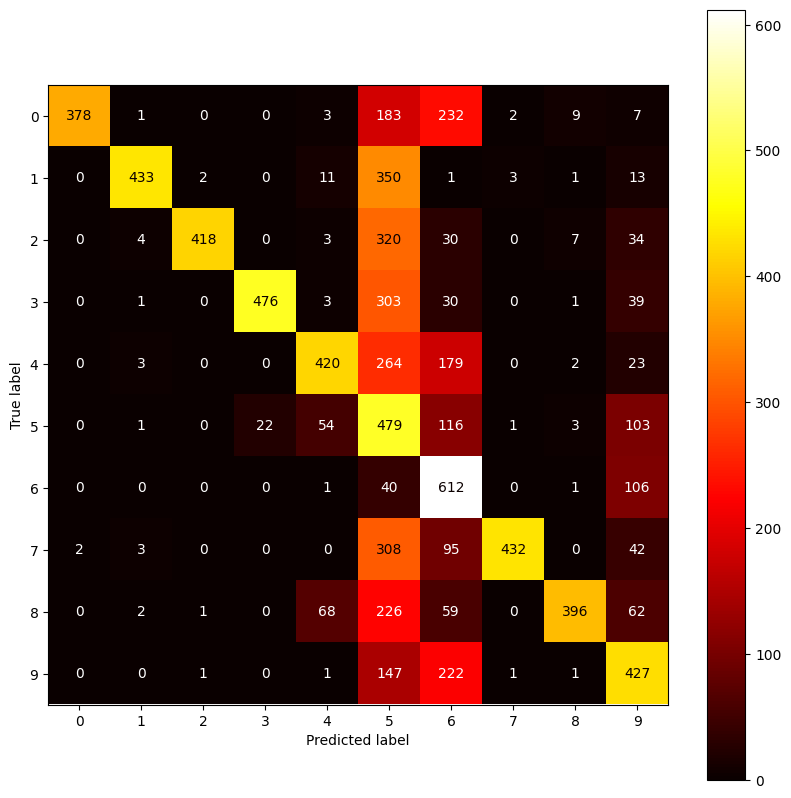

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

print("Accuracy : ", accuracy_score(ytrue, final_classification))

confusionMatrix = confusion_matrix(ytrue, final_classification)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='hot')

print(classification_report(y_true, y_pred))